<a href="https://colab.research.google.com/github/Atharv-1905/Deep-Learning/blob/main/DL_lab1_debugged_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras[tensorflow]
!pip install scikit-learn==1.5.2

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier

tf.random.set_seed(42)
np.random.seed(42)

In [4]:
data = pd.read_csv('/content/Admission_Predict_Ver1.1.csv')

In [5]:
data.columns = data.columns.str.strip()

In [6]:
data['Admit_Label'] = np.where(data['Chance of Admit'] >= 0.75, 1, 0)

In [7]:
X = data.drop(['Serial No.', 'Chance of Admit', 'Admit_Label'], axis=1)
y = data['Admit_Label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
display(X.head())

Training samples: 400
Testing samples: 100


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


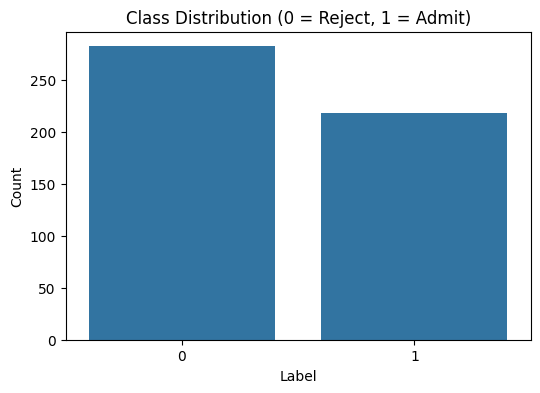

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution (0 = Reject, 1 = Admit)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [11]:
num_col = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [12]:
num_len = X_train.shape[1]

def create_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(num_len,)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid'),
    ])


    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=1)

num_transformer = Pipeline(steps=[
    ('inputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', num_transformer, num_col)
    ]
)


main_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

In [13]:
main_pipeline.fit(X_train, y_train)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1550 - loss: 0.9560
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4046 - loss: 0.7361 
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.5885 
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8423 - loss: 0.4906 
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8565 - loss: 0.4203 
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8553 - loss: 0.3685
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8617 - loss: 0.3320
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8576 - loss: 0.3066  
Epoch 9/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8623 - loss: 0.2892
Epoch 10/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8617 - loss: 0.2776
Epoch 11/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8567 - loss: 0.2696
Epoch 12/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8767 - l

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('inputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['GRE Score', 'TOEFL Score',
                                                   'University Rating', 'SOP',
                                                   'LOR', 'CGPA',
                                                   'Research'])])),
                ('model',
                 KerasClassifier(batch_size=32, build_fn=<function create_model at 0x7cb046fab9c0>, epochs=50))])

In [14]:
y_pred = main_pipeline.predict(X_test)

results_df = pd.DataFrame({
    'Actual (Ground Truth)': y_test,
    'Predicted (Model)': y_pred.flatten()
})

display(results_df.head(10))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


,Actual (Ground Truth),Predicted (Model)
361,1,1
73,1,1
374,0,0
155,1,0
104,0,1
394,1,1
377,0,0
124,0,0
68,0,1
450,1,1


In [15]:
acc = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {acc:.2%}")


Model Accuracy: 88.00%


In [16]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Reject (0)', 'Admit (1)']))


Classification Report:
              precision    recall  f1-score   support

  Reject (0)       0.96      0.84      0.90        64
   Admit (1)       0.77      0.94      0.85        36

    accuracy                           0.88       100
   macro avg       0.87      0.89      0.88       100
weighted avg       0.90      0.88      0.88       100

